In [49]:
from collections import defaultdict

def load_instance(filename):
	edges = []
	neighbours = defaultdict(list)
	flag = True
	f = open(filename,'r')
	for line in f:
		if flag == True:
			nnodes, nedges = [int(x) for x in line.split()]
			flag = False
		else:
			e1, e2 = [int(x) for x in line.split()]
			if e1!=e2 :
				edges.append((min(e1,e2),max(e1,e2)))
				neighbours[e1].append(e2)
				neighbours[e2].append(e1)
			else:
				nedges = nedges - 1
	f.close()

	f = []
	
	for v in neighbours:
		f.append(v)

	nodes = []

	for v in neighbours:
		nodes.append(v)

	lista_adj = []

	for n in nodes:
		lista_adj.append(neighbours[n])
		
	return nnodes, nedges, edges, neighbours, lista_adj
	     
def print_instance(qtd_nodes, qtd_edges, edges, neighbours):
    print(str(qtd_nodes)+" "+str(qtd_edges))

    for e in edges:
	    print(str(e[0])+" "+str(e[1]))

    for i in neighbours:
	    print(neighbours[i])
	
    print(neighbours)
    

In [50]:
nnodes, nedges, edges, neighbours, lista_adj = load_instance("./can_715.mtx")

print_instance(nnodes, nedges, edges, neighbours)

715 2975
1 2
1 3
1 24
1 25
1 26
1 99
1 150
1 151
1 165
1 166
1 167
1 182
1 183
1 184
2 3
2 26
2 99
3 4
3 26
3 27
3 99
3 150
3 151
3 152
3 167
3 168
3 184
3 185
3 186
4 5
4 6
4 27
4 28
4 99
4 151
4 152
4 153
4 168
4 169
4 186
4 187
4 188
5 6
5 28
5 99
6 7
6 28
6 29
6 99
6 152
6 153
6 154
6 169
6 170
6 188
6 189
6 190
7 8
7 9
7 29
7 30
7 99
7 153
7 154
7 155
7 170
7 171
7 190
7 191
7 192
8 9
8 30
8 99
9 10
9 30
9 31
9 99
9 154
9 155
9 156
9 171
9 172
9 192
9 193
9 194
10 11
10 12
10 31
10 32
10 99
10 155
10 156
10 157
10 172
10 173
10 194
10 195
10 196
11 12
11 32
11 99
12 13
12 32
12 33
12 99
12 156
12 157
12 158
12 173
12 174
12 196
12 197
12 198
13 14
13 15
13 33
13 34
13 99
13 157
13 158
13 159
13 174
13 175
13 198
13 199
13 200
14 15
14 34
14 99
15 16
15 34
15 35
15 99
15 158
15 159
15 160
15 175
15 176
15 200
15 201
15 202
16 17
16 18
16 35
16 36
16 99
16 159
16 160
16 161
16 176
16 177
16 202
16 203
16 204
17 18
17 36
17 99
18 19
18 36
18 37
18 99
18 160
18 161
18 162
18 177
18 17

In [51]:
print(type(nnodes))
print(type(nedges))
print(type(edges))
print(type(neighbours))

print(nnodes)
print(nedges)

<class 'int'>
<class 'int'>
<class 'list'>
<class 'collections.defaultdict'>
715
2975


In [52]:
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
df = pd.read_csv("./can_715.mtx", sep=" ")

df.head()

,715,3690
0,1,1
1,2,1
2,3,1
3,24,1
4,25,1


In [54]:
df.tail()

,715,3690
3685,713,713
3686,714,713
3687,714,714
3688,715,714
3689,715,715


In [55]:
df.shape

(3690, 2)

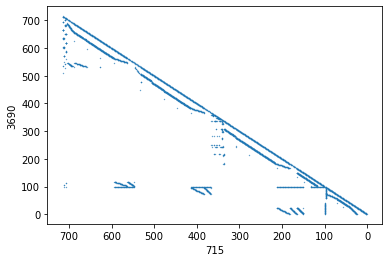

In [56]:
df.plot(kind="scatter", x ="715", y="3690", s=.1)
plt.gca().invert_xaxis()
plt.show()

In [57]:
import numpy as np

import networkx as nx
from networkx.utils import cuthill_mckee_ordering
from networkx.utils import reverse_cuthill_mckee_ordering



# CUTCHILL MCKEE
def cuthill(lista):
    G = nx.Graph()
    G.add_edges_from(lista)
    rcm1 = list(cuthill_mckee_ordering(G))
    A = nx.laplacian_matrix(G, nodelist=rcm1)
    x1, y1 = np.nonzero(A)
    return x1, y1

In [58]:
x, y = cuthill(edges)
print(len(x))


6665


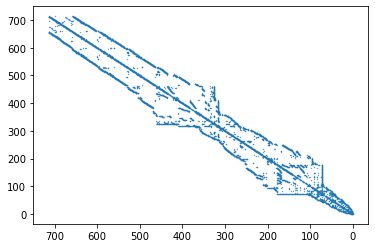

In [59]:
plt.scatter(x = x, y = y,s=.1)
plt.gca().invert_xaxis()
plt.show()

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx


# build low-bandwidth numpy matrix
G = nx.Graph()
G.add_edges_from(edges)


rcm = list(nx.utils.reverse_cuthill_mckee_ordering(G))
# print("ordering", rcm)

print("unordered Laplacian matrix")
A = nx.laplacian_matrix(G)
x, y = np.nonzero(A)
# print(f"lower bandwidth: {(y - x).max()}")
# print(f"upper bandwidth: {(x - y).max()}")
?

B = nx.laplacian_matrix(G, nodelist=rcm)
print("low-bandwidth Laplacian matrix")
x, y = np.nonzero(B)
# print(f"lower bandwidth: {(y - x).max()}")
# print(f"upper bandwidth: {(x - y).max()}")
?

# sns.heatmap(B.todense(), cbar=False, square=True, linewidths=0.5, annot=True)
# plt.show()

print(B.todense())

unordered Laplacian matrix
low-bandwidth Laplacian matrix
[[ 5 -1  0 ...  0  0  0]
 [-1  6 -1 ...  0  0  0]
 [ 0 -1  5 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0 -1]
 [ 0  0  0 ...  0  5 -1]
 [ 0  0  0 ... -1 -1  4]]



IPython -- An enhanced Interactive Python

IPython offers a fully compatible replacement for the standard Python
interpreter, with convenient shell features, special commands, command
history mechanism and output results caching.

At your system command line, type 'ipython -h' to see the command line
options available. This document only describes interactive features.

GETTING HELP
------------

Within IPython you have various way to access help:

  ?         -> Introduction and overview of IPython's features (this screen).
  object?   -> Details about 'object'.
  object??  -> More detailed, verbose information about 'object'.
  %quickref -> Quick reference of all IPython specific syntax and magics.
  help      -> Access Python's own help system.

If you are in terminal IPython you can quit this screen by pressing `q`.


MAIN FEATURES
-------------

* Access to the standard Python help with object docstrings and the Python
  manuals. Simply type 'help' (no quotes) to invoke it.

* Ma

In [61]:
df2 = pd.DataFrame(B.todense())



In [63]:
from pandas.plotting import scatter_matrix
#attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df2, figsize=(12, 8))

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f51d57bda60> (for post_execute):


KeyboardInterrupt: 